In [90]:
import pandas as pd

In [91]:
data = pd.read_csv("광주광역시_전기차충전소충전량(2020).csv")

In [92]:
data.head(1)

,Unnamed: 0,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,지역(구)
0,2,광주전남,서광주,효천2지구 중흥S클래스,급속01,8462,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,남구


In [93]:
#필요없는 컬럼 삭제
data.drop(columns=['Unnamed: 0','본부','사업소','충전소명','충전기','충전기ID','주소'],inplace=True)

In [94]:
data

,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,지역(구)
0,급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,남구
1,완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00,광산구
2,완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00,광산구
3,완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00,동구
4,완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00,광산구
...,...,...,...,...,...,...,...,...,...
57267,완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41:41,2020-12-03 02:42:07,서구
57268,급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09:58,2020-12-03 08:49:57,서구
57269,완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50:16,2020-12-03 04:16:21,동구
57270,완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05:04,2020-12-03 04:52:37,광산구


In [95]:
#데이터를 지역구 기준으로 그룹화 시키고 충전량을 모두 더함
data_region_use = data.groupby('지역(구)')['충전량'].sum()

In [96]:
data_region_use

지역(구)
광산구    364103.6900
남구     102145.4000
동구     110948.4300
북구     708654.2007
서구     561987.4889
Name: 충전량, dtype: float64

In [97]:
#데이터 프레임으로 만듬
pd.DataFrame(data_region_use)

,충전량
지역(구),
광산구,364103.6900
남구,102145.4000
동구,110948.4300
북구,708654.2007
서구,561987.4889


In [98]:
# 월단위 쪼개기 위해 data_time 충전시작시간을 -로 split함
data_time= data['충전시작시각'].str.split('-')

In [99]:
#위에 split한거에서 첫번째를 가져옴
data['월'] = data_time.str.get(1)

In [100]:
data.head(1)

,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,지역(구),월
0,급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,남구,01


In [101]:
#12월은 데이터가 적어서 12월을 뺄려고함
data_non12 = data[data['월']!='12']

In [102]:
data_non12

,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,지역(구),월
0,급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,남구,01
1,완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00,광산구,01
2,완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00,광산구,01
3,완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00,동구,01
4,완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00,광산구,01
...,...,...,...,...,...,...,...,...,...,...
56731,급속,50.0,10.32,2,33,2020-12-01,2020-11-30 21:46:35,2020-12-01 00:20:23,서구,11
56732,완속,7.0,54.81,8,33,2020-12-01,2020-11-30 18:42:38,2020-12-01 03:16:36,서구,11
56733,완속,7.0,33.10,6,42,2020-12-01,2020-11-30 18:54:24,2020-12-01 01:37:21,서구,11
56734,완속,7.0,27.40,4,32,2020-12-01,2020-11-30 23:00:42,2020-12-01 03:33:34,북구,11


In [103]:
#지역구 월 충전량을 새로운 데이터 프레임으로 만듬
data_month_use = data_non12[['지역(구)','월','충전량']]

In [104]:
data_month_use

,지역(구),월,충전량
0,남구,01,17.65
1,광산구,01,26.83
2,광산구,01,11.91
3,동구,01,11.76
4,광산구,01,12.33
...,...,...,...
56731,서구,11,10.32
56732,서구,11,54.81
56733,서구,11,33.10
56734,북구,11,27.40


In [105]:
# 충전량을 다 더하기 위해 함수화
def func(x):
    d={}
    d['충전량합계']=x['충전량'].sum()
    return pd.Series(d,index=['충전량합계'])

In [106]:
#지역구,월 기준으로 충전량을 다 더함
data_month_use.groupby(['지역(구)','월']).apply(func)

충전량합계
지역(구) 월              
광산구   01   33837.6380
      02   27479.9420
      03   30646.8500
      04   33580.9420
      05   32756.7640
      06   30534.5680
      07   33319.5240
      08   36795.5860
      09   31878.6400
      10   35787.1640
      11   33886.3100
남구    01   10039.0200
      02    8765.0100
      03    8432.2800
      04    8777.7600
      05    9313.9700
      06    8580.1200
      07    8451.5400
      08    9429.0700
      09    8529.5900
      10   10288.9100
      11   10636.1000
동구    01   10069.0200
      02    8348.9400
      03    9239.0800
      04    9223.5400
      05    9086.5800
      06    9531.5600
      07    9715.4500
      08   11036.3000
      09   10023.8000
      10   11301.8200
      11   12125.8000
북구    01   60370.9600
      02   55223.2300
      03   48197.1800
      04   53134.3500
      05   50154.2800
      06   35324.5800
      07   71936.2300
      08   33668.5000
      09   50522.2500
      10   96178.4000
      11  134224.9799
서구    01   56918.7900
      02   52132.4160
      03   47467.2240
      04   51845.4900
      05   56531.5200
      06   38688.1160
      07   50250.0520
      08   55662.9060
      09   45301.2830
      10   51150.2409
      11   49986.5710

In [107]:
data_month_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56496 entries, 0 to 56735
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역(구)   56496 non-null  object 
 1   월       56496 non-null  object 
 2   충전량     56496 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.7+ MB


In [108]:
#지역을 동구 서구 남구 북구 광산구 기준으로 1,2,3,4,5로 바꿀 예정
def func(x):
    if x == '광산구':
        return 5
    elif x == '동구':
        return 1
    elif x == '서구':
        return 2
    elif x == '남구':
        return 3
    elif x == '북구':
        return 4

data_month_use['지역(구)']=data_month_use['지역(구)'].apply(lambda x : func(x))

/var/folders/7r/vc4lzfvs707bgzdxv1t9q33c0000gn/T/ipykernel_86590/3760353550.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month_use['지역(구)']=data_month_use['지역(구)'].apply(lambda x : func(x))


In [109]:
data_month_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56496 entries, 0 to 56735
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역(구)   56496 non-null  int64  
 1   월       56496 non-null  object 
 2   충전량     56496 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


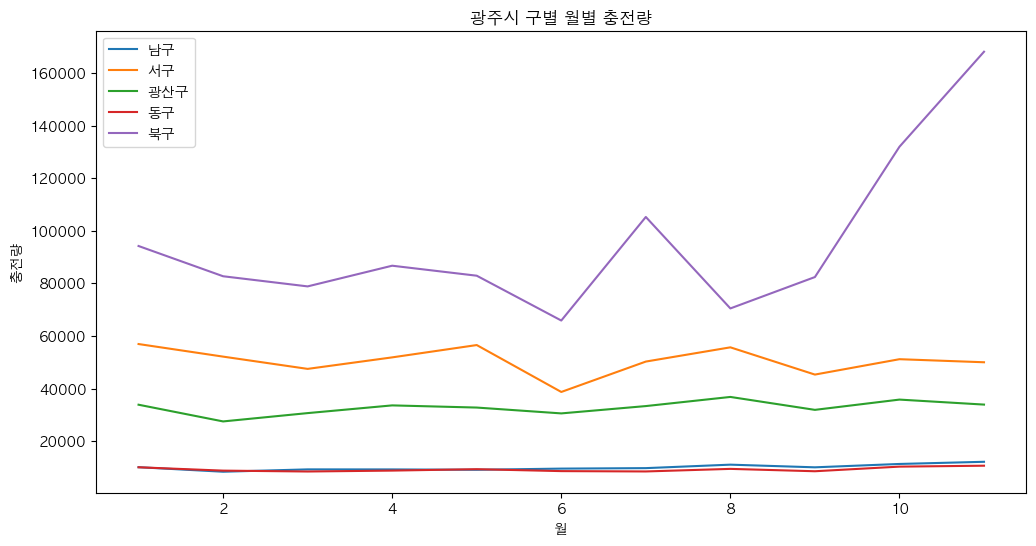

In [120]:

data10 = {
    '남구': [10069.0200, 8348.9400,9239.0800,9223.5400,9086.5800,9531.5600,9715.4500,11036.3000,10023.8000,11301.8200,12125.8000],
    '서구': [56918.7900,52132.4160,47467.2240,51845.4900,56531.5200,38688.1160,50250.0520,55662.9060,45301.2830,51150.2409,49986.5710],
    '광산구': [33837.6380,27479.9420,30646.8500,33580.9420,32756.7640,30534.5680,33319.5240,36795.5860,31878.6400,35787.1640,33886.3100],
    '동구': [10039.0200,8765.0100,8432.2800,8777.7600,9313.9700,8580.1200,8451.5400,9429.0700,8529.5900,10288.9100,10636.1000],
    '북구': [94208.5980,82703.1720,78844.0300,86715.2920,82911.0440,65859.1480,105255.7540,70464.0860,82400.8900,131965.5640,168111.2899]
}
# 폰트
plt.rcParams['font.family'] = 'AppleGothic'

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))
for gu, values in data10.items():
    ax.plot(range(1, 12), values, label=gu)

ax.set_xlabel('월')
ax.set_ylabel('충전량')
ax.set_title('광주시 구별 월별 충전량')
ax.legend()
plt.show()


In [132]:
# 월 이라는 컬럼이 object로 되어있어서 int로 바꿈
data_month_use=data_month_use.astype({'월':'int'})

In [133]:
data_month_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56496 entries, 0 to 56735
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역(구)   56496 non-null  int64  
 1   월       56496 non-null  int64  
 2   충전량     56496 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.7 MB


<Axes: >

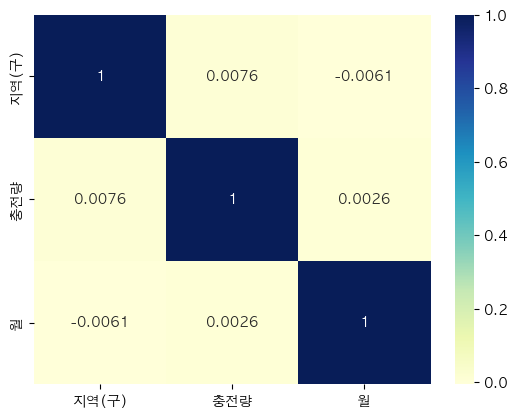

In [139]:
# 상관분석 --> 
import pandas as pd
import numpy as np
import matplotlib as plt


# 상관계수 구하기
corr_matrix = data_month_use[['지역(구)','충전량','월']].corr()
# 맥북 한글 사용하기
plt.rcParams['font.family'] = 'AppleGothic'
# 시각화
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")



In [ ]:
# from sklearn import svm
# from sklearn import datasets


# clf = svm.LinearSVC()
# # learn from the data
# clf.fit(data, data.)
# # predict for unseen data
# clf.predict([[ 5.0,  3.6,  1.3,  0.25]])
# # Parameters of model can be changed by using the attributes ending with an underscore
# print(clf.coef_ )